In [154]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data = pd.read_csv('abalone.data.txt', sep=",", header = None)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'ring']

Populating the interactive namespace from numpy and matplotlib


In [155]:
features = list(data.columns)
ring = data.as_matrix(['ring']) # create class column
del features[-1]
X = data.as_matrix(features)

In [156]:
# Convert the String in Sex to integer
for row in X:
    if row[0] == 'M':
        row[0] = 0
    elif row[0] == 'F':
        row[0] = 1
    else:
        row[0] = 2

In [157]:
# Size down the classes from 29 to 3 categories.
y_list = []
a = 0
for r in ring:
    if r[0] < 10:
        y_list.append('young')
    elif r[0] >= 10 and r[0] < 20:
        y_list.append('middle_aged')
    else:
        y_list.append('old')
Y = np.asarray(y_list)

The above codes are from the previous assignment. Originally data has 29 classes. I made it to be have only 3 classes: young, middle_aged, old. I stick with these 3 classes in this assignment. I know it is recommended that dataset is binary, and the labels are 0 or 1. But in my case, labels are not continuous and they can be regarded as binary. The reason I said this is, I remembered I asked a question regarding a question in quiz, that a dataset has label 'weather' and can be 'sunny', 'cloudy', or 'rainy', and in the quiz the dataset is regarded as binary. So the dataset used below has 3 classes, and analyzes and the curves are all based on these 3 classes.

### 1. Accuracy of the model ###

In [158]:
# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.5,random_state=0)

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2088, 8), (2089, 8), (2088,), (2089,))

In [160]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [161]:
# predict label using the model
y_pred = []
for i in range(len(X_test)):
    pred = clf.predict([X_test[i]])
    y_pred.append(pred[0])

In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.70129248444231684

So among the testing data, the model is able to predict 70% of the abalone to the correct age group. This seems to be a satisfying classification accuracy. I changed the test_size to 0.2, 0.3, 0.4, and the accuracy_score was between 68% and 70%. The accuracy score appears to be stable regardless the difference in test data ratio.

### 2. Precision and Recal Values ###

**Precision Value**

In [163]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.70129248444231684

In [164]:
precision_score(y_test, y_pred, average=None, labels=['young', 'middle_aged', 'old'])

array([ 0.73006724,  0.69890329,  0.08888889])

The parameter average = 'micro' means metric is calculated globally by counting the total true positives (tp), false positives (fp) and calculation tp / (tp + fp). The precision_score in this case is equivalant to the accuracy score. This makes sense, since accuracy score measures number of correct predictions from all predictions made, and precision_score is the number of positive predictions divided by the total number of positive class values predicted.


When setting average = None, the scores for each class are returned in the order the class names are passed in. It is observed that precision_score for classes 'young' and 'middle_aged' are similar, both around 70%. This is close to the classification accuracy. The precision value for class 'old' is much lower, 9.4%. One possible reason is that the number of training data for class 'old' much less compared to other classes: 

In [165]:
class_young_in_train = 0
class_middle_aged_in_train = 0
class_old_in_train = 0
for classname in y_train:
    if classname == 'young':
        class_young_in_train += 1
    elif classname == 'middle_aged':
        class_middle_aged_in_train += 1
    else:
        class_old_in_train += 1

class_young_in_train, class_middle_aged_in_train, class_old_in_train

(1052, 1003, 33)

In [166]:
class_young_in_test = 0
class_middle_aged_in_test = 0
class_old_in_test = 0
for classname in y_test:
    if classname == 'young':
        class_young_in_test += 1
    elif classname == 'middle_aged':
        class_middle_aged_in_test += 1
    else:
        class_old_in_test += 1

class_young_in_test, class_middle_aged_in_test, class_old_in_test

(1044, 1016, 29)

So with only 33 instances in training, not much information is provided to the model regarding model 'old'. It is reasonable that the model can't make accurdate predicionts for class 'old'.

**Recall Value**

In [167]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro') 

0.70129248444231684

In [168]:
recall_score(y_test, y_pred, average=None, labels=['young', 'middle_aged', 'old'])

array([ 0.72796935,  0.68996063,  0.13793103])

When setting the parameter average='micro', this metric is calculated globally by counting the total true positives (tp), false negatives (fn) and do calculation tp / (tp + fn). The result is the same as the precision score. One direct reason is that, since precision = tp / (tp + fp) and recall = tp / (tp + fn), fp = fn. 

When setting the parameter average=None, recall score for each class is printed. The recall scores for class 'young' and 'middle_aged' are similar to the precision scores, and the recall scores for class 'old' is slightly better than the precision socre, but still low. 

Class 'old' having low precision and recall scores mean the fp and fn are both high for class 'old'. In another word, instances belong to class 'old' are falsely put into other classes, and some instances belong to other classes are falsely put into class 'old'. I think the main reason still being the insufficient training data for class 'old'.

### 3. Classification Report ###

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['young', 'middle_aged', 'old']))

             precision    recall  f1-score   support

      young       0.73      0.73      0.73      1044
middle_aged       0.70      0.69      0.69      1016
        old       0.09      0.14      0.11        29

avg / total       0.71      0.70      0.70      2089



The classification report illustrate the precision, recall, f1-score and support measurement of the test data. The precision and recall are identical to what was computed above. The f1-score is the harmonic mean of precision and recall. The support has been calculated before, and again the instances that belong to 'old' are much less compared to the instances that belong to 'young' and 'middle_aged'. 

### 4. Confusion Matrix ###

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=['young', 'middle_aged', 'old'])

array([[760, 282,   2],
       [276, 701,  39],
       [  5,  20,   4]])

Confusion Matrix is a much detailed representation of each class. 
* Among the 1044 instances in class 'young', 762 are predicted to be the correct class, 278 are classified to be 'middle_aged', and 4 are clssified to be 'old'. 
* Among the 1016 instances in class 'middle_aged', 692 are predicted to be the correct class, 280 are classified to be 'young', and 44 are clssified to be 'old'. 
* Among the 29 instances in class 'old', 5 are predicted to be the correct class, 4 are classified to be 'young', and 20 are clssified to be 'middle_aged'. 

So the model performs similar on class 'young' and 'middle_aged', but performs less satisfied on class 'old'. It is worth notice that the model is likely to predict class 'old' as class 'middle_aged'. Aside from not having enough training dataset, this might be caused by the features of class 'middle_aged' and 'old' are not that easy to differentiate, whereas the features of class 'young' and 'middle_aged' are easy to differentiate. This aligns with our common sense, for creatues including abalones and even human, the size/weight will change dramaticaly during the growth perid, but will stable once mature.

### 6. Make ROC curve ###

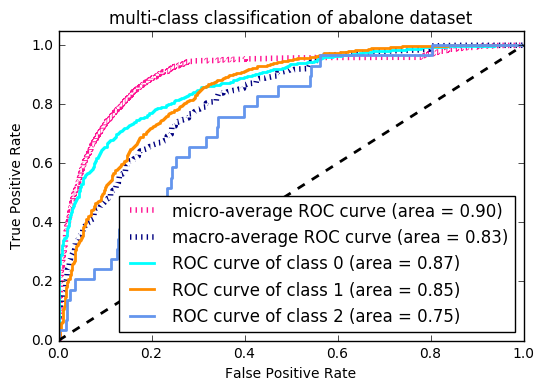

In [171]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-class classification of abalone dataset')
plt.legend(loc="lower right")
plt.show()

At first sight, the ROC curves are all above the line of no discrimination (random ordering), but are not so close to the perfect point on the top left corner. The closest one is the micro-average ROC curve.

The solid lines in the plot are ROC curves for all the classes. Class 0, 1, 2 corresponds to 'young', 'middle_aged', 'old', respectively. This order is passed in when binarizing the output Y. 

It is observed that the curve of class 'young' and 'middle_aged' are smooth and mostly convex. This indicates the classifier is able to separte between these classes reasonably. However, the curve for class 'old' is not as smooth. It is flat on the right top corner, and get much steeper on the left bottom part. The curve is a mix of convex and many concavities. This indicates a less satisfying separation of between this class and other classes.

The AUC of the micro-average ROC curve is 0.9, close to the ideal value 1.0. In addition, the AUCs of class 'young' and 'middle_aged' are between 0.85 and 0.9. The less satisfying curve of class 'old' has a lower AUC 0.75.

### 5. Make Precision/Recall curve ###

The abalone dataset is multi-class. It is necessary to transform multiclass lables to binary labels. Below I use the OneVsRestClassifier classifier.

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
Y_Binarized = label_binarize(Y, classes=['young', 'middle_aged', 'old'])
n_classes = Y_Binarized.shape[1]

# Split into training and test
random_state = np.random.RandomState(0)
X_train, X_test, y_train_binarized, y_test_binarized = train_test_split(X, Y_Binarized, test_size=.5, random_state=random_state)

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train_binarized).decision_function(X_test)

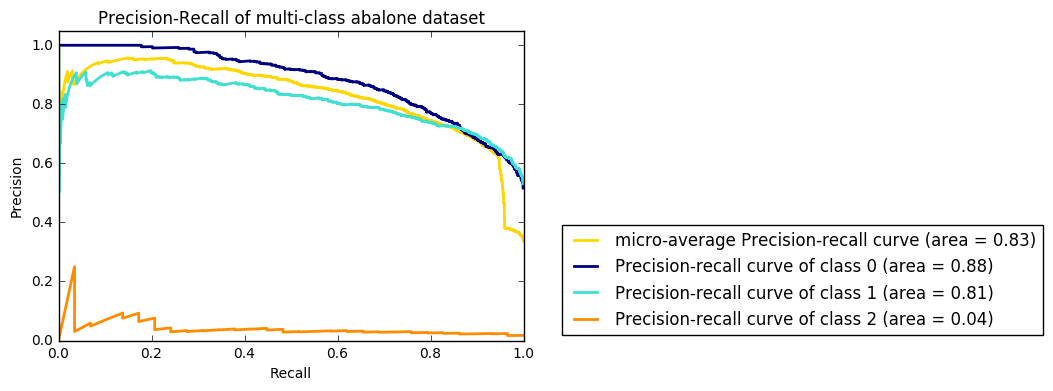

In [173]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
lw = 2

# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall of multi-class abalone dataset')
plt.legend(loc='upper center', bbox_to_anchor=(1.6, 0.4), ncol=1)
plt.show()

The curves in dark blue, light blue and orange in the plot belong to class 0, 1 and 2, and they correspond to the classes 'young', 'middle_aged' and 'old', respectively. 

It is observed that when recall is 0.0, the the precision of class 'young' is 1.0, while the precisions of classes 'middle_aged' and 'old' are 0.8 and 0 respectively and have a number of disturbance when recalls are low. Later, the curve for class 'young' and 'middle_aged' decrease smoothly with mostly convex, while the curve for class 'old' has many concavities and becomes flat when recall is high.

The AUC for class 'young' and 'middle_aged' are between 0.8 and 0.9. Not as perfect (1.0), but satisfying. However, the AUC for class old is '0.04'. This means no matter how recall changes, precision is always low. This may indicate that the number of false positive for class 'old' are larger than the false negative. This aligns with the confusion matrix.